# Generating a Composite Stellar Population Spectrum for a Single Galaxy

In [1]:
import os
os.environ['SPS_HOME'] = 'fsps'

import fsps
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sp = fsps.StellarPopulation(
    sfh=0,  # Simple stellar population
    imf_type=1  # Chabrier IMF
)

(0.0, 2.5e-13)

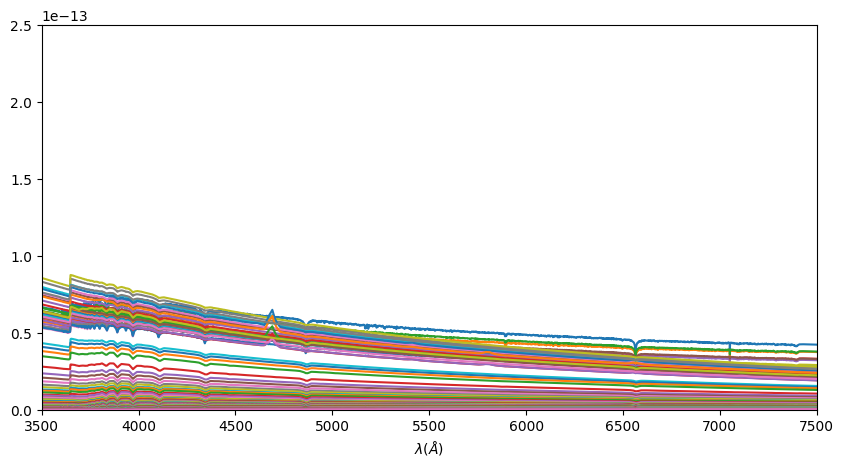

In [3]:
wav, spec = sp.get_spectrum()

plt.figure(figsize=(10, 5))
plt.plot(wav, spec.T)
plt.xlabel('$\\lambda (\\AA)$')
plt.xlim(3500,7500)
plt.ylim(0,2.5e-13)

In [11]:
np.min(sp.resolutions)

np.float64(-8933.5866)

In [36]:
wav[4663]

9010.0

In [4]:
ages = sp.ssp_ages
ages

array([ 5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,  5.85,  5.9 ,
        5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,  6.3 ,  6.35,
        6.4 ,  6.45,  6.5 ,  6.55,  6.6 ,  6.65,  6.7 ,  6.75,  6.8 ,
        6.85,  6.9 ,  6.95,  7.  ,  7.05,  7.1 ,  7.15,  7.2 ,  7.25,
        7.3 ,  7.35,  7.4 ,  7.45,  7.5 ,  7.55,  7.6 ,  7.65,  7.7 ,
        7.75,  7.8 ,  7.85,  7.9 ,  7.95,  8.  ,  8.05,  8.1 ,  8.15,
        8.2 ,  8.25,  8.3 ,  8.35,  8.4 ,  8.45,  8.5 ,  8.55,  8.6 ,
        8.65,  8.7 ,  8.75,  8.8 ,  8.85,  8.9 ,  8.95,  9.  ,  9.05,
        9.1 ,  9.15,  9.2 ,  9.25,  9.3 ,  9.35,  9.4 ,  9.45,  9.5 ,
        9.55,  9.6 ,  9.65,  9.7 ,  9.75,  9.8 ,  9.85,  9.9 ,  9.95,
       10.  , 10.05, 10.1 , 10.15])

In [5]:
t_bins = np.linspace(5.5, 10.15, 10)
t_spec = {}
t_avg = dict(zip(t_bins[1:], np.zeros(len(t_bins))))
t_bins

array([ 5.5       ,  6.01666667,  6.53333333,  7.05      ,  7.56666667,
        8.08333333,  8.6       ,  9.11666667,  9.63333333, 10.15      ])

In [6]:
weights = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [7]:
spec_ages = dict(zip(ages, spec))
for key, value in spec_ages.items():
    for t in range(len(t_bins)):
        if key <= t_bins[t] and key > t_bins[t - 1]:
            t_spec.setdefault(t_bins[t], []).append(value)
    
for key, value in t_spec.items():
    t_avg[key] = np.vstack(value).mean(axis=0)

for key, w in zip(t_avg.keys(), weights):
    t_avg[key] *= w
t_avg

{6.016666666666667: array([9.68125384e-26, 2.87397293e-25, 5.82251481e-25, ...,
        1.26272288e-23, 1.23963431e-23, 1.21693142e-23]),
 6.533333333333333: array([8.60571671e-26, 2.67808976e-25, 5.56324887e-25, ...,
        3.89170079e-23, 3.82053594e-23, 3.75058231e-23]),
 7.050000000000001: array([8.25251770e-28, 2.94464072e-27, 6.60672690e-27, ...,
        7.19869350e-22, 7.06711532e-22, 6.93764616e-22]),
 7.566666666666666: array([8.80393706e-38, 5.84406207e-37, 1.92458958e-36, ...,
        4.82672501e-23, 4.73846665e-23, 4.65168324e-23]),
 8.083333333333334: array([5.46271190e-43, 5.46271190e-43, 5.46271190e-43, ...,
        8.49525411e-23, 8.33371696e-23, 8.17923670e-23]),
 8.600000000000001: array([2.65647363e-21, 2.67549770e-21, 3.40174003e-21, ...,
        1.76175149e-22, 1.72560788e-22, 1.69295471e-22]),
 9.116666666666667: array([3.37764210e-21, 3.50083503e-21, 4.36318442e-21, ...,
        7.92295574e-23, 7.77646135e-23, 7.63331739e-23]),
 9.633333333333333: array([1.40112

(0.0, 3e-13)

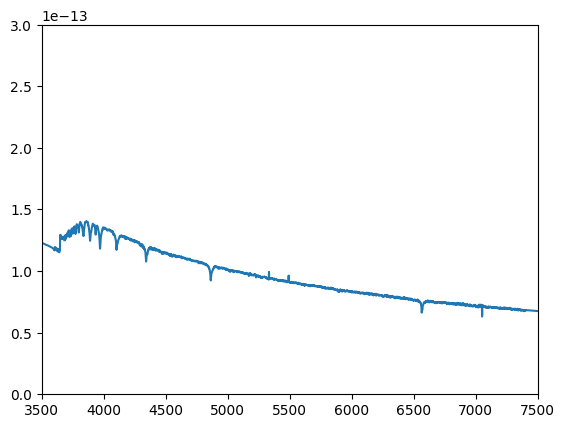

In [8]:
s = np.vstack(list(t_avg.values())).sum(axis=0)
plt.plot(wav, s)
plt.xlim(3500,7500)
plt.ylim(0,3e-13)

In [9]:
len(t_avg)

9

In [10]:
def init_spectrum(weights):
    sp = fsps.StellarPopulation(
        sfh=0,  # Simple stellar population
        imf_type=1  # Chabrier IMF
    ) 

    wav, spec = sp.get_spectrum()

    ages = sp.ssp_ages
    t_bins = np.linspace(5.5, 10.15, 10)
    t_spec = {}
    t_avg = dict(zip(t_bins[1:], np.zeros(len(t_bins))))

    spec_ages = dict(zip(ages, spec))
    for key, value in spec_ages.items():
        for t in range(len(t_bins)):
            if key <= t_bins[t] and key > t_bins[t - 1]:
                t_spec.setdefault(t_bins[t], []).append(value)
    
    for key, value in t_spec.items():
        t_avg[key] = np.vstack(value).mean(axis=0)

    for key, w in zip(t_avg.keys(), weights):
        t_avg[key] *= w
    
    s = np.vstack(list(t_avg.values())).sum(axis=0)
    return wav, s